In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./train.csv')
df_kg = pd.read_csv('./test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_kg.set_index('PassengerId', inplace=True)
df1.drop(['Name','Cabin','Embarked','Ticket','SibSp'], axis=1, inplace=True)
df_kg.drop(['Name','Cabin','Embarked','Ticket','SibSp'], axis=1, inplace=True)

In [15]:
# 결측치 처리
df1.Age.fillna(df1.Age.median(), inplace=True)
df_kg.Fare.fillna(df1.Fare.median(), inplace=True)
df_kg.Age.fillna(df1.Age.median(), inplace=True)
m1_med = df1.loc[(df1.Pclass == 1) & (df1.Sex == 'male'), 'Age'].median()
m2_med = df1.loc[(df1.Pclass == 2) & (df1.Sex == 'male'), 'Age'].median()
m3_med = df1.loc[(df1.Pclass == 3) & (df1.Sex == 'male'), 'Age'].median()
f1_med = df1.loc[(df1.Pclass == 1) & (df1.Sex == 'female'), 'Age'].median()
f2_med = df1.loc[(df1.Pclass == 2) & (df1.Sex == 'female'), 'Age'].median()
f3_med = df1.loc[(df1.Pclass == 3) & (df1.Sex == 'female'), 'Age'].median()
df1.loc[(df1.Pclass == 1) & (df1.Sex == 'male'), 'Age'].fillna(m1_med, inplace=True)
df1.loc[(df1.Pclass == 1) & (df1.Sex == 'male')&(df1.Age.isna()), 'Age'] = m1_med
df1.loc[(df1.Pclass == 2) & (df1.Sex == 'male')&(df1.Age.isna()), 'Age'] = m2_med
df1.loc[(df1.Pclass == 3) & (df1.Sex == 'male')&(df1.Age.isna()), 'Age'] = m3_med
df1.loc[(df1.Pclass == 1) & (df1.Sex == 'female')&(df1.Age.isna()), 'Age'] = f1_med
df1.loc[(df1.Pclass == 2) & (df1.Sex == 'female')&(df1.Age.isna()), 'Age'] = f2_med
df1.loc[(df1.Pclass == 3) & (df1.Sex == 'female')&(df1.Age.isna()), 'Age'] = f3_med

In [16]:
# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_kg[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_kg[i] = globals()[f'df_kg_{i}_encoder'].transform(df_kg[i])

In [17]:
# X, y 분리
X = df1.drop('Fare', axis=1)
y = df1.Fare

,Survived,Pclass,Sex,Age,Parch,Fare
PassengerId,,,,,,
1,0,3,1,22.0,0,7.2500
2,1,1,0,38.0,0,71.2833
3,1,3,0,26.0,0,7.9250
4,1,1,0,35.0,0,53.1000
5,0,3,1,35.0,0,8.0500
...,...,...,...,...,...,...
887,0,2,1,27.0,0,13.0000
888,1,1,0,19.0,0,30.0000
889,0,3,0,28.0,2,23.4500


In [18]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [20]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)
lr_pred = linear_reg.predict(X_test)
mean_squared_error(y_test, lr_pred)

800.6274873706643

In [102]:
boston  = pd.read_csv('./boston_data.csv')
boston_test = pd.read_csv('./boston_test_data.csv')
X = boston.drop('medv', axis=1)
y = boston.medv
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X, y, test_size=0.2, random_state=19)
from sklearn.linear_model import LinearRegression
boston_linear_reg = LinearRegression(normalize=True)
boston_linear_reg.fit(X_train_boston, y_train_boston)
boston_pred = boston_linear_reg.predict(X_test_boston)
mean_squared_error(y_test_boston, boston_pred)

39.47975635758842

array([[1.00000000e+00, 1.58760000e-01, 0.00000000e+00, ...,
        1.38694213e+07, 3.63532347e+05, 9.52857109e+03],
       [1.00000000e+00, 1.03280000e-01, 2.50000000e+01, ...,
        1.33913401e+07, 3.11081269e+05, 7.22642807e+03],
       [1.00000000e+00, 3.49400000e-01, 0.00000000e+00, ...,
        1.56065514e+07, 3.92684528e+05, 9.88053892e+03],
       ...,
       [1.00000000e+00, 1.50100000e-02, 9.00000000e+01, ...,
        1.56210802e+06, 1.24804343e+04, 9.97122074e+01],
       [1.00000000e+00, 2.05500000e-02, 8.50000000e+01, ...,
        5.24461755e+06, 7.62445031e+04, 1.10841719e+03],
       [1.00000000e+00, 8.24400000e-02, 3.00000000e+01, ...,
        5.82279872e+06, 9.76068102e+04, 1.63617014e+03]])

In [124]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=4)
X_pf = pf.fit_transform(X)
X_trn, X_val, y_trn, y_val = train_test_split(X_pf, y, test_size=0.2, random_state=19)
for i in range(1,10):
    ridge = Ridge(alpha=i*0.1,normalize=True, random_state=19)
    ridge.fit(X_trn, y_trn)
    pred_rid = ridge.predict(X_val)
    print(i*0.1)
    print('mse',mean_squared_error(y_val, pred_rid))

0.1
mse 47.22769010386137
0.2
mse 42.887712715130704
0.30000000000000004
mse 41.103954994663354
0.4
mse 40.25943215417573
0.5
mse 39.83874178843023
0.6000000000000001
mse 39.6375188539428
0.7000000000000001
mse 39.560887226860004
0.8
mse 39.55955054639765
0.9
mse 39.6056713886747


In [127]:
pf_test = PolynomialFeatures(degree=4)
boston_poly_test = pf_test.fit_transform(boston_test)

In [128]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.8)
ridge.fit(X_pf, y)
pred_test_rid = ridge.predict(boston_poly_test)
bos = pd.read_csv('./bos_test3.csv')
bosid  = bos.iloc[:,:1]
bosid['price'] = pred_test_rid
bosid.set_index('id', inplace=True)
bosid.to_csv('boston_ridge_answer1.csv')

In [104]:
from sklearn.linear_model import Ridge

    ridge = Ridge(alpha=i)
    ridge.fit(X_trn, y_trn)
    pred_rid = ridge.predict(X_val)
    print(i)



1
가중치(계수, 기울기 파라미터 W) : [ 0.00000000e+00  1.94305518e-05  1.29527527e-04  2.19088179e-06
  6.85840823e-08  1.41394641e-06  5.91117223e-05 -1.93245459e-04
 -1.39252709e-04 -7.96424937e-06  3.64921778e-04 -3.66518020e-05
 -7.19958132e-04 -3.65087678e-05  2.92398940e-04  8.32986501e-05
  1.80521643e-05  1.88530311e-05 -2.41829986e-05  2.14805840e-04
  1.77906345e-03 -3.07501454e-04  2.04551456e-04  5.05444466e-03
  1.52193640e-04  6.50280776e-03 -1.08208162e-03 -3.03686971e-02
  2.24861551e-03 -3.48733102e-06  2.56190671e-05  1.75160032e-04
  3.75849484e-02  6.35231498e-04  2.51945498e-03 -1.27896844e-02
  1.23812107e-03  1.58881376e-02  6.07284413e-03  5.06223414e-04
  1.41363695e-05 -9.18421899e-06  2.36326582e-04 -2.33992425e-03
 -6.63330524e-04 -9.68374012e-05  1.21595293e-02  3.42916148e-04
 -2.20666539e-03 -1.02516251e-03  6.85840823e-08  1.32365501e-05
  1.66230812e-05 -1.16173969e-05  4.51342554e-05 -1.60133291e-05
  3.41728231e-05  1.40526897e-05 -8.91711750e-04  9.64561546e-05
 

In [ ]:
    bt_lr_model = Ridge(alpha=alpha, normalize=True, random_state=19)

In [ ]:
poly = PolynomialFeatures(5)
    X_poly = poly.fit_transform(X_pca)
    X_trn, X_val, y_trn, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=19)
    bt_lr_model = Ridge(alpha=alpha, normalize=True, random_state=19)
    bt_lr_model.fit(X_trn, y_trn)
    bt_lr_pred = bt_lr_model.predict(X_val)
    val_mse = round(mean_squared_error(y_val, bt_lr_pred), 3)
    trn_r2 = round(bt_lr_model.score(X_trn, y_trn), 3)
    val_r2 = round(bt_lr_model.score(X_val, y_val), 3)


In [30]:
boston_linear_reg = LinearRegression(normalize=True)
boston_linear_reg.fit(X_train_boston, y_train_boston)
boston_pred = boston_linear_reg.predict(X_test_boston)
print("가중치(계수, 기울기 파라미터 W) :", boston_linear_reg.coef_)
print("편향(절편 파라미터 b) :", boston_linear_reg.intercept_)
print("훈련세트 점수(설명력): {:.2f}".format( boston_linear_reg.score(X_train_boston, y_train_boston) ))
print("테스트세트 점수(설명력): {:.2f}".format( boston_linear_reg.score(X_test_boston, y_test_boston) ))
print('MSE :', mean_squared_error(y_test_boston, boston_pred))

가중치(계수, 기울기 파라미터 W) : [-1.31877126e-01  4.88058438e-02  3.51323967e-02  3.40466010e+00
 -1.35768297e+01  4.21091354e+00 -9.57174887e-03 -1.31269125e+00
  2.57344349e-01 -1.17391858e-02 -7.81903503e-01  1.07573660e-02
 -4.80627456e-01]
편향(절편 파라미터 b) : 27.23578773956906
훈련세트 점수: 0.79
테스트세트 점수: 0.62
MSE : 39.47975635758842


<AxesSubplot:>

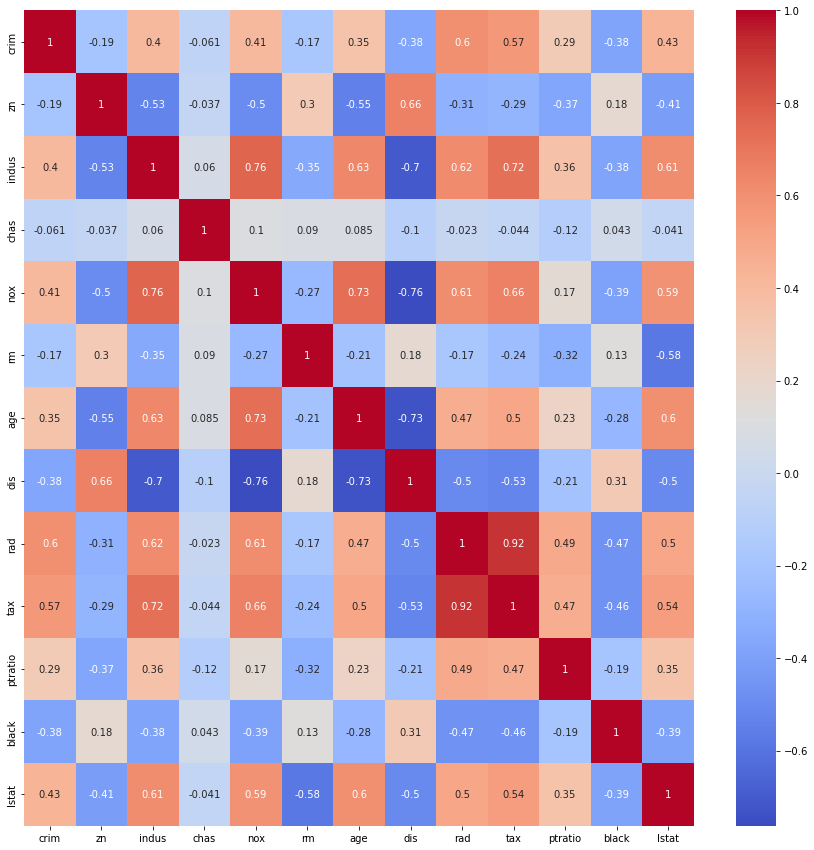

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True, cmap='coolwarm')
# 너무 높은 상관 계수(약 0.9 이상)은 다중공선성(거의 같은 데이터) 의심

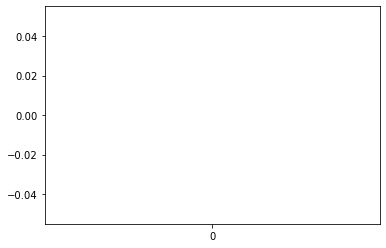

In [31]:
for i in X.columns:
    sns.barplot()
    plt.show

In [39]:
tol_X = X.iloc[:,:-1]
tol_y = X.iloc[:,-1]

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, boston_pred)

0.6247348692283031

In [54]:
from sklearn.linear_model import Ridge

for i in range(20,40):
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_boston, y_train_boston)
    pred_rid = ridge.predict(X_test_boston)
    print(i)

    print("가중치(계수, 기울기 파라미터 W) :", ridge.coef_)
    print("편향(절편 파라미터 b) :", ridge.intercept_)
    print("훈련세트 점수: {:.2f}".format( ridge.score(X_train_boston, y_train_boston) ))
    print("테스트세트 점수: {:.2f}".format( ridge.score(X_test_boston, y_test_boston) ))
    print('MSE :', mean_squared_error(y_test_boston, pred_rid))
    print()

20
가중치(계수, 기울기 파라미터 W) : [-0.12533993  0.05448777 -0.00963373  1.34586519 -0.67409308  3.57350599
 -0.01565839 -1.13390456  0.25096114 -0.01371421 -0.68219549  0.01211331
 -0.55596427]
편향(절편 파라미터 b) : 23.78470171709865
훈련세트 점수: 0.78
테스트세트 점수: 0.63
MSE : 39.06048044705455

21
가중치(계수, 기울기 파라미터 W) : [-0.12529984  0.05471554 -0.00974909  1.30900238 -0.64507041  3.53592622
 -0.01539497 -1.13399541  0.2516741  -0.01374983 -0.68364129  0.01208974
 -0.55853774]
편향(절편 파라미터 b) : 24.062447265638426
훈련세트 점수: 0.78
테스트세트 점수: 0.63
MSE : 39.039392537599575

22
가중치(계수, 기울기 파라미터 W) : [-0.12525999  0.05493645 -0.00986091  1.27416184 -0.61853109  3.49912332
 -0.01513456 -1.13405218  0.25237132 -0.0137842  -0.68505238  0.01206639
 -0.56104698]
편향(절편 파라미터 b) : 24.334823275224327
훈련세트 점수: 0.78
테스트세트 점수: 0.63
MSE : 39.02076885793468

23
가중치(계수, 기울기 파라미터 W) : [-0.12522031  0.05515079 -0.00996942  1.24118039 -0.59416465  3.4630784
 -0.01487727 -1.13407353  0.25305302 -0.01381741 -0.68642834  0.01204327
 -0.5634

In [56]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=33)
ridge.fit(X_train_boston, y_train_boston)
pred_rid = ridge.predict(X_test_boston)

print("가중치(계수, 기울기 파라미터 W) :", ridge.coef_)
print("편향(절편 파라미터 b) :", ridge.intercept_)
print("훈련세트 점수: {:.2f}".format( ridge.score(X_train_boston, y_train_boston) ))
print("테스트세트 점수: {:.2f}".format( ridge.score(X_test_boston, y_test_boston) ))
print('MSE :', mean_squared_error(y_test_boston, pred_rid))

가중치(계수, 기울기 파라미터 W) : [-0.1248266   0.05698475 -0.01089229  0.98766216 -0.42787789  3.14019112
 -0.01248057 -1.13231656  0.25908694 -0.01409842 -0.6983222   0.01182815
 -0.58506798]
편향(절편 파라미터 b) : 26.99138924649316
훈련세트 점수: 0.78
테스트세트 점수: 0.63
MSE : 38.93690575924507


In [87]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=33)
ridge.fit(X, y)
pred_test_rid = ridge.predict(boston_test)
bos = pd.read_csv('./bos_test3.csv')
bosid  = bos.iloc[:,:1]
bosid['price'] = pred_test_rid
bosid.set_index('id', inplace=True)
bosid.to_csv('boston_ridge_answer.csv')

In [75]:
from sklearn import linear_model
for i in range(1,30):
    lasso = linear_model.Lasso(alpha=i*0.01)
    lasso.fit(X_train_boston, y_train_boston)
    pred_lasso = lasso.predict(X_test_boston)
    print(i*0.01)

    print("가중치(계수, 기울기 파라미터 W) :", lasso.coef_)
    print("편향(절편 파라미터 b) :", lasso.intercept_)
    print("훈련세트 점수: {:.2f}".format( lasso.score(X_train_boston, y_train_boston) ))
    print("테스트세트 점수: {:.2f}".format( lasso.score(X_test_boston, y_test_boston) ))
    print('MSE :', mean_squared_error(y_test_boston, pred_lasso))
    print()

0.01
가중치(계수, 기울기 파라미터 W) : [ -0.12994181   0.04869267   0.0226634    3.12036431 -10.18878181
   4.2668624   -0.01265038  -1.25473679   0.24980006  -0.01199634
  -0.74218008   0.01126865  -0.48504477]
편향(절편 파라미터 b) : 24.449089158044245
훈련세트 점수: 0.79
테스트세트 점수: 0.62
MSE : 39.50821179164099

0.02
가중치(계수, 기울기 파라미터 W) : [-0.12800682  0.04857966  0.01019953  2.83605454 -6.80064396  4.32280803
 -0.01572882 -1.19677218  0.24226154 -0.01225384 -0.70245811  0.01177998
 -0.4894636 ]
편향(절편 파라미터 b) : 21.662360550855308
훈련세트 점수: 0.79
테스트세트 점수: 0.62
MSE : 39.65556470672493

0.03
가중치(계수, 기울기 파라미터 W) : [-0.1260396   0.04855437  0.          2.54702792 -3.44869218  4.37959211
 -0.01880418 -1.13743277  0.23530888 -0.0125675  -0.66319773  0.01229166
 -0.49415252]
편향(절편 파라미터 b) : 18.888238072560327
훈련세트 점수: 0.79
테스트세트 점수: 0.62
MSE : 39.923965571919965

0.04
가중치(계수, 기울기 파라미터 W) : [-0.12404661  0.04860277 -0.00833737  2.25413316 -0.12748109  4.43704429
 -0.02187695 -1.07700688  0.22883224 -0.01292695 -0.624318

In [77]:
lasso = linear_model.Lasso(alpha=0.23)
lasso.fit(X_train_boston, y_train_boston)
pred_lasso = lasso.predict(X_test_boston)


print("가중치(계수, 기울기 파라미터 W) :", lasso.coef_)
print("편향(절편 파라미터 b) :", lasso.intercept_)
print("훈련세트 점수: {:.2f}".format( lasso.score(X_train_boston, y_train_boston) ))
print("테스트세트 점수: {:.2f}".format( lasso.score(X_test_boston, y_test_boston) ))
print('MSE :', mean_squared_error(y_test_boston, pred_lasso))

가중치(계수, 기울기 파라미터 W) : [-0.11910758  0.05170708  0.          0.         -0.          3.71329016
 -0.01286991 -1.03193984  0.22732981 -0.01322173 -0.64653853  0.01213082
 -0.55468597]
편향(절편 파라미터 b) : 21.26363380669304
훈련세트 점수: 0.78
테스트세트 점수: 0.63
MSE : 38.76933686061239


In [88]:
lasso = linear_model.Lasso(alpha=0.23)
lasso.fit(X, y)
pred_lasso = lasso.predict(boston_test)
bos = pd.read_csv('./bos_test3.csv')
bosid  = bos.iloc[:,:1]
bosid['price'] = pred_lasso
bosid.set_index('id', inplace=True)
bosid.to_csv('boston_lasso_answer.csv')

In [91]:
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

def ridge_objective(search_space):
    model = Ridge(**search_space)
    model.fit(X_train_boston, y_train_boston)
    y_pred = model.predict(X_test_boston)
    mse = mean_squared_error(y_test_boston, y_pred)
    return {'loss': -mse, 'status': STATUS_OK}

# new search space
search_space={'alpha':hp.choice('alpha', range(25,40)),
              'normalize':hp.choice('normalize', [True,False]),
              'copy_X':hp.choice('copy_X', [True, False]),
              'max_iter':hp.choice('max_iter', range(1,10)),
              'tol':hp.choice('tol', [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.1]),
              'solver':hp.choice('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']),
              'random_state':hp.choice('random_state', [None, range(1,10)])}

# set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
best_params = fmin(fn=ridge_objective,
                   space=search_space,
                   algo=algorithm,
                   max_evals=500)

params1 = space_eval(search_space, best_params)

100%|██████| 500/500 [00:03<00:00, 135.76trial/s, best loss: -1053836.413730937]


In [92]:
params1

{'alpha': 25,
 'copy_X': True,
 'max_iter': 3,
 'normalize': False,
 'random_state': None,
 'solver': 'sparse_cg',
 'tol': 0.1}

In [ ]:
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

def xgb_objective(search_space):
    model = XGBClassifier(**search_space)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# new search space
search_space={'loss':hp.choice('loss', ['deviance', 'exponential']),
              'max_depth':hp.choice('max_depth', range(2, 10)),
              'min_samples_split':hp.uniform('min_samples_split', 0.1, 1),
              'min_samples_leaf':hp.choice('min_samples_leaf', range(1, 30)),
              'max_features':hp.choice('max_features', [None, 'sqrt', 'log2']),
              'min_impurity_decrease':hp.uniform('min_impurity_decrease', 0.1, 1),
              'ccp_alpha':hp.uniform('ccp_alpha', 0.01, 1),
              'learning_rate':hp.choice('learning_rate', [0.1, 0.01]),
              'n_estimators':hp.choice('n_estimators', [100, 200, 300, 400, 500,1000])}

# set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
best_params = fmin(fn=xgb_objective,
                   space=search_space,
                   algo=algorithm,
                   max_evals=500)

params1 = space_eval(search_space, best_params)